<a href="https://colab.research.google.com/github/najwhoas/bnpl-knowledge-mining-paper/blob/main/evaluate_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import model repository
!git clone https://github.com/najwhoas/nlp-bnpl.git

Cloning into 'nlp-bnpl'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 52 (delta 13), reused 11 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 16.08 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
# Install libraries
!pip install bertopic
!pip install --ignore-installed -r /content/nlp-bnpl/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import torch
import logging
import nltk
from nltk import word_tokenize
from gensim.corpora.dictionary import Dictionary
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic.representation import KeyBERTInspired
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

In [ ]:
# Retrieve dataset
dataset = pd.read_csv('/content/nlp-bnpl/data/bnpl-dataset.csv')

In [ ]:
# Recleaning irrelevant words
banned_words = ['lau hasil','moga', 'shopeepay', 'gopaylater', 'sdah', 'sih', 'spinjam', 'hci', 'ovopaylater', 'shopee', 'tokopedia', 'gojek','deposit','shoope', 'shoppe', 'shope', 'tolong', 'kayak', 'ongkos', 'kirim', 'mohon', 'nya','banget', 'akulaku', 'kredivo', 'kreivo', 'kredivoo', 'kridivo', 'ayo', 'ya', 'bintang', 'indodana', 'bca','aamiin', 'shopintar', 'terima', 'kasih', 'kali', 'kemarin', 'cuman', 'alhamdulillah', 'go', 'grab', 'alfamart','alfamidi', 'indomaret', 'ovo', 'ovi', 'ktanya', 'haha', 'pulsa', 'token','listrik', 'pln','bnk','babk','suah']
re_banned_words = re.compile(r"\b(" + "|".join(banned_words) + r")\b", re.I)

def remove_banned_word(text):
    global re_banned_words
    return re_banned_words.sub("", text)

dataset['lemmatized'] = dataset['lemmatized'].apply(lambda x: remove_banned_word(str(x)))

In [ ]:
# Build documents for topic modeling
docs = dataset['lemmatized'].dropna().astype(str).to_list()

In [ ]:
# Encode the inputted documents into word embeddings
sentence_model = SentenceTransformer("firqaaa/indo-sentence-bert-base")
embeddings = sentence_model.encode(docs, show_progress_bar=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/118 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/709k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/141 [00:00<?, ?it/s]

In [ ]:
# Load trained BERTopic modeling
model_path = '/content/nlp-bnpl/model_dir/topic_model_dir'

topic_model = BERTopic.load(model_path, embedding_model=sentence_model)

In [ ]:
# Extract topics
topics, probs = topic_model.transform(docs, embeddings)

2025-03-05 04:19:41,143 - BERTopic - Predicting topic assignments through cosine similarity of topic and document embeddings.


In [ ]:
# Calculate the Cophenetic Correlation Coefficient (CCC) metric

# Apply the implemented UMAP model in the trained BERTopic modeling
umap_model = UMAP(n_neighbors=30, n_components=10, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

distance_matrix = pdist(reduced_embeddings, metric='cosine')
linkage_matrix = sch.linkage(distance_matrix, method='average')
coph_corr = sch.cophenet(linkage_matrix, distance_matrix)[0]
print(f"Cophenetic Correlation Coefficient: {coph_corr:.4f}")

Cophenetic Correlation Coefficient: 0.8139


In [ ]:
# Calculate coherence score of each factor

coherence_scores = {}
for label in dataset['factor_label'].unique():
    texts = dataset[dataset['factor_label'] == label]['content'].str.split().tolist()
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    tfidf = TfidfModel(corpus)
    top_words = [
        [dictionary[word_id] for word_id, _ in sorted(tfidf[doc], key=lambda x: x[1], reverse=True)[:10]]
        for doc in corpus
    ]
    coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores[label] = coherence_model.get_coherence()

coherence_scores

{'FAC_10': 0.8643166581130324,
 'Outlier': 0.8074447425688043,
 'FAC_3': 0.853031784786948,
 'FAC_5': 0.8773156136984736,
 'FAC_1': 0.7295455100354741,
 'FAC_6': 0.9377972121857254,
 'FAC_7': 0.8739772265956044,
 'FAC_8': 0.8564481505815632,
 'FAC_2': 0.8835316705010332,
 'FAC_9': 0.8785578201334859,
 'FAC_4': 0.8637947334993163}

In [ ]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [ ]:
# Visualize dendrogram of HDBSCAN clustering
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 36/36 [00:00<00:00, 115.72it/s]


In [ ]:
# Visualize top words and c-TF-IDF scores of each topic
topic_model.visualize_barchart(top_n_topics=37)

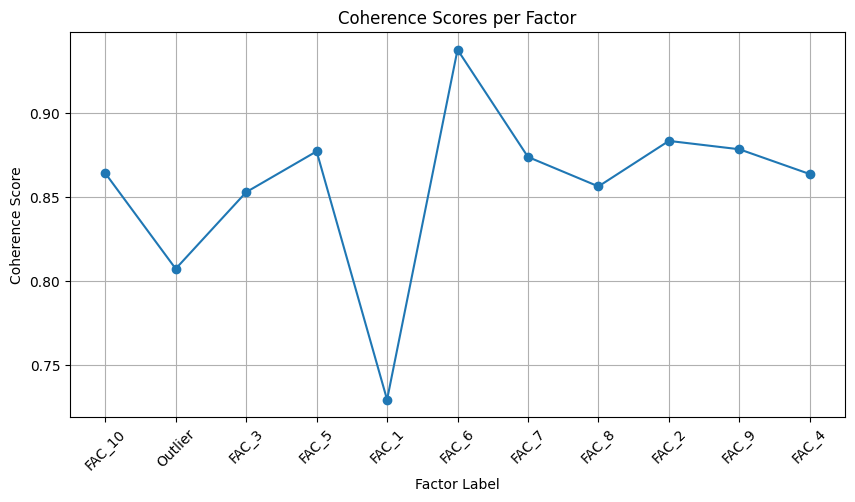

In [ ]:
# Plot Coherence Scores
plt.figure(figsize=(10, 5))
plt.plot(coherence_scores.keys(), coherence_scores.values(), marker='o', linestyle='-')
plt.xlabel('Factor Label')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores per Factor')
plt.xticks(rotation=45)
plt.grid()
plt.show()